In [2]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPool2D, Conv2D, Activation
from IPython.display import clear_output
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pathlib
# necessary libraries
import os

import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

from glob import glob
from skimage.io import imread
%matplotlib inline

from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalMaxPooling2D

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!pip install split-folders

In [5]:
!pip install mplcyberpunk
!pip install split-folders

import pathlib, os, random, mplcyberpunk
import splitfolders
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPool2D, Conv2D, Activation

In [6]:
from IPython.display import clear_output
import tensorflow as tf
import pandas as pd
import seaborn as sns

In [7]:
path="/content/drive/MyDrive/RS_images_2800/RS_images_2800"
base_path = pathlib.Path(path)
base_path

PosixPath('/content/drive/MyDrive/RS_images_2800/RS_images_2800')

In [100]:
splitfolders.ratio(base_path, output='Main_data', seed=123, ratio=(0.70, 0.15, 0.15),
                  group_prefix=None)

Copying files: 2800 files [00:16, 164.72 files/s]


In [10]:
# necessary libraries
import os
import pandas as pd

# visualizations libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

from glob import glob
import os
import numpy as np
import pandas as pd
import random
from skimage.io import imread

import matplotlib.pyplot as plt
%matplotlib inline

from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalMaxPooling2D

Image width: 400
Image height: 400


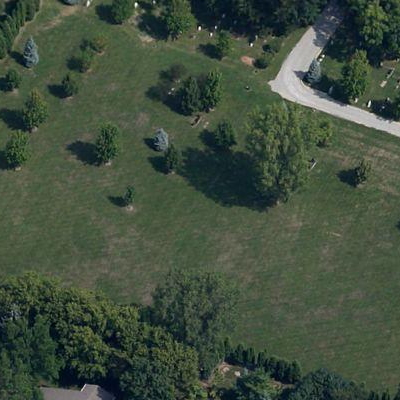

In [14]:
import cv2
from PIL import Image
image_path = '/content/Main_data/test/aGrass/a001.jpg'
image = cv2.imread(image_path)
im = Image.open(image_path)
height, width, _ = image.shape

print("Image width:", width)
print("Image height:", height)
im.show()

In [56]:
train_dataset_path = '/content/Main_data/train'
validation_dataset_path = '/content/Main_data/val'

In [75]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
BATCH_SIZE = 32

In [74]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 2240 images belonging to 7 classes.


In [59]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 280 images belonging to 7 classes.


In [60]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : aGrass
1 : bField
2 : cIndustry
3 : dRiverLake
4 : eForest
5 : fResident
6 : gParking


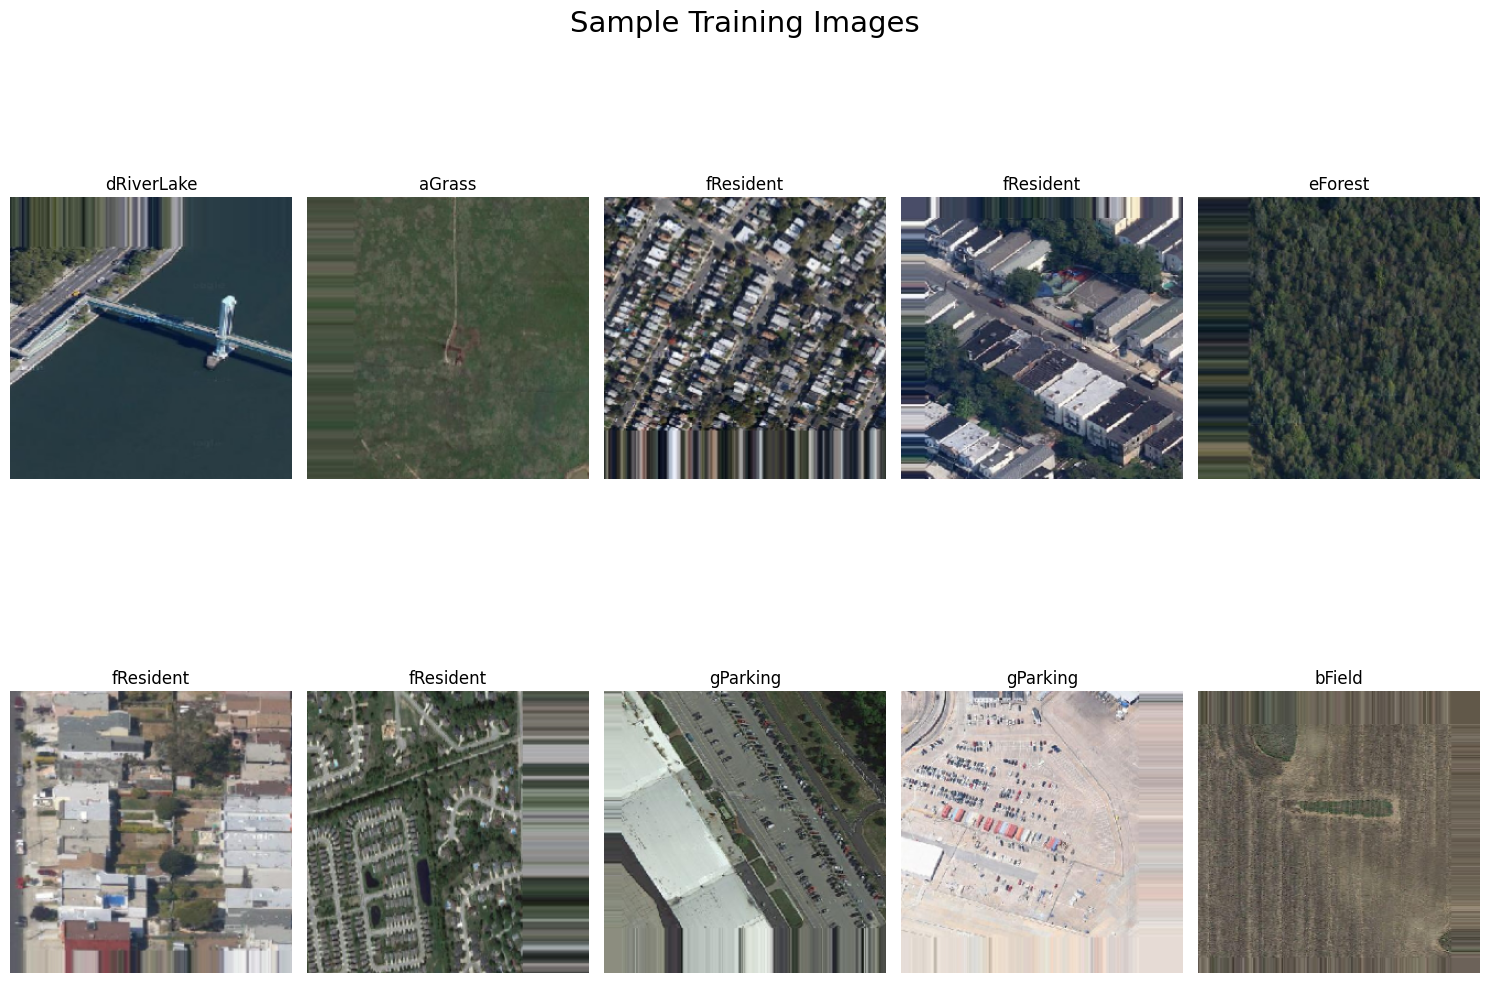

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [70]:
from keras.layers import AveragePooling2D

In [101]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(labels), activation='softmax')  # Output layer with number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_157 (Conv2D)         (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_158 (Conv2D)         (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 246016)            0         
                                                                 
 dense_35 (Dense)            (None, 128)             

In [126]:
epochs = 30 # Adjust the number of epochs as needed

# Train the model
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)


Epoch 1/30
70/70 [==============================] - 381s 5s/step - loss: 0.7443 - accuracy: 0.6929 - val_loss: 0.8583 - val_accuracy: 0.6953
Epoch 2/30
70/70 [==============================] - 353s 5s/step - loss: 0.7573 - accuracy: 0.6884 - val_loss: 0.8252 - val_accuracy: 0.6836
Epoch 3/30
70/70 [==============================] - 343s 5s/step - loss: 0.7462 - accuracy: 0.6875 - val_loss: 0.8200 - val_accuracy: 0.6719
Epoch 4/30
70/70 [==============================] - 354s 5s/step - loss: 0.7075 - accuracy: 0.7161 - val_loss: 0.8642 - val_accuracy: 0.6953
Epoch 5/30
70/70 [==============================] - 351s 5s/step - loss: 0.7042 - accuracy: 0.7241 - val_loss: 0.7253 - val_accuracy: 0.7188
Epoch 6/30
70/70 [==============================] - 345s 5s/step - loss: 0.6875 - accuracy: 0.7254 - val_loss: 1.0180 - val_accuracy: 0.6250
Epoch 7/30
70/70 [==============================] - 360s 5s/step - loss: 0.6449 - accuracy: 0.7446 - val_loss: 0.6187 - val_accuracy: 0.7734
Epoch 8/30
70

In [127]:
model.save("model_sequential.h5")

In [128]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

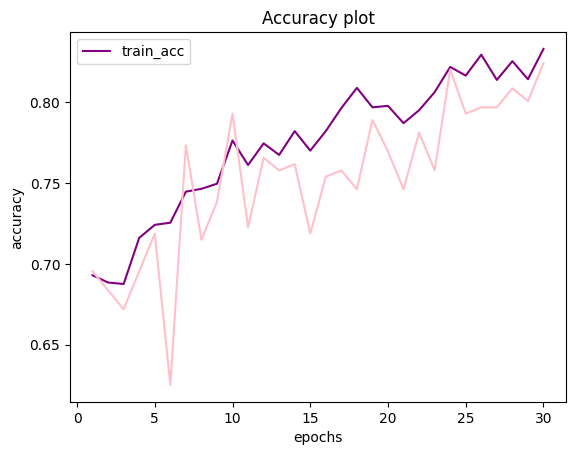

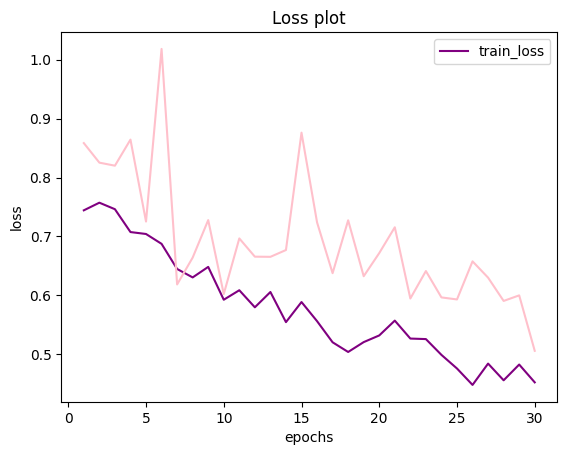

In [129]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss"])
plt.show()

In [130]:
test_loss, test_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print('Test Loss:', test_loss)

print('Test Accuracy:', test_accuracy)

8/8 [==============================] - 12s 1s/step - loss: 0.4990 - accuracy: 0.8203
Test Loss: 0.499009907245636
Test Accuracy: 0.8203125


In [131]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [132]:
train_generator.class_indices

{'aGrass': 0,
 'bField': 1,
 'cIndustry': 2,
 'dRiverLake': 3,
 'eForest': 4,
 'fResident': 5,
 'gParking': 6}

In [133]:
image_path = '/content/Main_data/test/aGrass/a138.jpg'
img = image.load_img(image_path, target_size=(256,256,3))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
class_labels = train_generator.class_indices
predicted_class_label = list(class_labels.keys())[predicted_class_index]

print('Predicted class:', predicted_class_label)

1/1 [==============================] - 0s 99ms/step
Predicted class: aGrass
